In [1]:
# libraries
from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import graphviz

C:\Users\Alix Gates\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# import data
cred_df = pd.read_csv('data/credit_data.csv')
geo_df = gpd.read_file('data/chi_boundaries.geojson')
#cred_df.head()
#geo_df.head()

In [3]:
cred_df['zip'] = cred_df['zipcode'].astype(int)
geo_df['zip'] = geo_df['zip'].astype(int)

C:\Users\Alix Gates\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


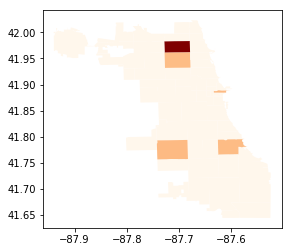

In [4]:
cred_zip_counts = cred_df.groupby('zip').count()
#print(cred_zip_counts)
# Make a smaller dataframe with two columns: "zip" and "count"
c_zipcounts = pd.DataFrame({'zip': cred_zip_counts.index, 'count': cred_zip_counts['SeriousDlqin2yrs']})
cjoined = geo_df.join(c_zipcounts, on='zip', how='left', lsuffix='l', rsuffix='r')
cjoined.plot(column='count', cmap='OrRd')
plt.show()

In [5]:
cred_df.corr()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,zip
PersonID,1.000000,-0.622739,0.004499,0.108533,-0.021010,-0.082598,0.006864,0.019755,0.022669,-0.076856,0.004341,-0.065353,-0.030364,-0.021010
SeriousDlqin2yrs,-0.622739,1.000000,-0.004586,-0.173728,-0.045051,0.149334,-0.013502,-0.032810,-0.039898,0.139609,-0.010641,0.121886,0.065708,-0.045051
RevolvingUtilizationOfUnsecuredLines,0.004499,-0.004586,1.000000,-0.008003,0.006009,-0.001999,0.022250,0.005832,-0.014590,-0.001686,0.004763,-0.001413,0.005342,0.006009
age,0.108533,-0.173728,-0.008003,1.000000,0.005408,-0.068696,0.038828,0.048138,0.159866,-0.069036,0.049168,-0.063622,-0.211002,0.005408
zipcode,-0.021010,-0.045051,0.006009,0.005408,1.000000,-0.002424,0.002088,-0.004980,-0.009214,-0.001487,0.003141,-0.001198,-0.001744,1.000000
NumberOfTime30-59DaysPastDueNotWorse,-0.082598,0.149334,-0.001999,-0.068696,-0.002424,1.000000,-0.011620,-0.015224,-0.070704,0.984465,-0.037863,0.988530,-0.007840,-0.002424
DebtRatio,0.006864,-0.013502,0.022250,0.038828,0.002088,-0.011620,1.000000,-0.022988,0.082791,-0.014790,0.177858,-0.013290,-0.070558,0.002088
MonthlyIncome,0.019755,-0.032810,0.005832,0.048138,-0.004980,-0.015224,-0.022988,1.000000,0.107100,-0.017954,0.127313,-0.015336,0.060528,-0.004980
NumberOfOpenCreditLinesAndLoans,0.022669,-0.039898,-0.014590,0.159866,-0.009214,-0.070704,0.082791,0.107100,1.000000,-0.098176,0.442776,-0.087154,0.060218,-0.009214
NumberOfTimes90DaysLate,-0.076856,0.139609,-0.001686,-0.069036,-0.001487,0.984465,-0.014790,-0.017954,-0.098176,1.000000,-0.054661,0.992143,-0.015737,-0.001487


In [6]:
# explore data
# correlations

def make_scatter(dataframe):
    '''
    function to make scatterplots showing how each variable changes based on whether they are
    delinquent or not
    input: dataframe
    output: scatterplots!'''
    ignore = ['zipcode', 'PersonID', 'SeriousDlqin2yrs']
    for col in list(dataframe):
        if col not in ignore:
            for cols in list(dataframe):
                if cols not in ignore:
                    dataframe.plot.scatter(col, cols, figsize = (10,5))
                    plt.title(col + ' vs ' + cols)
                    plt.xlabel(col) # units unclear...
                    plt.ylabel(cols)

                    plt.show()

# commented this out because it takes too much time to run
#make_scatter(cred_df) 

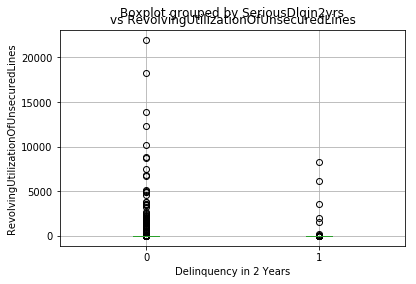

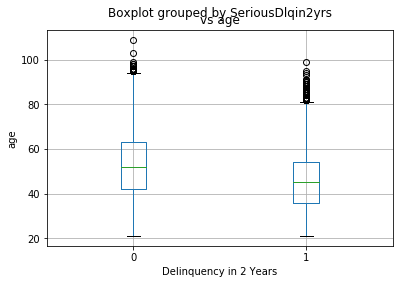

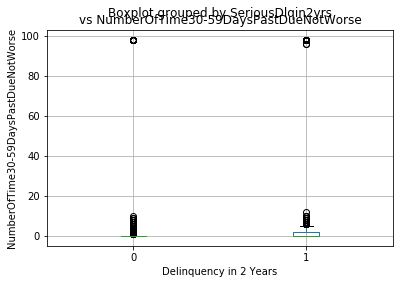

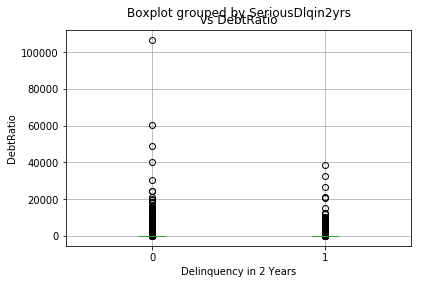

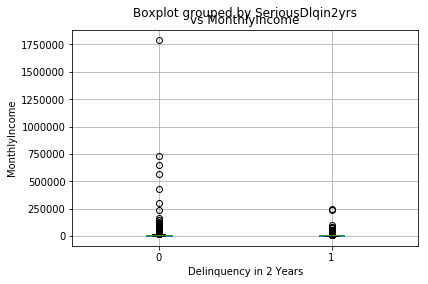

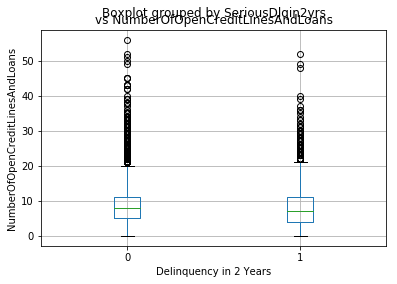

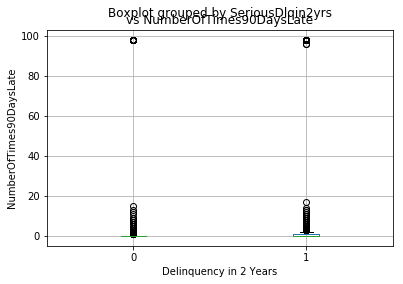

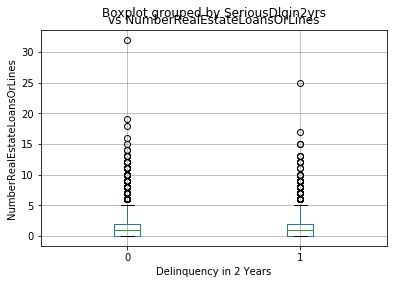

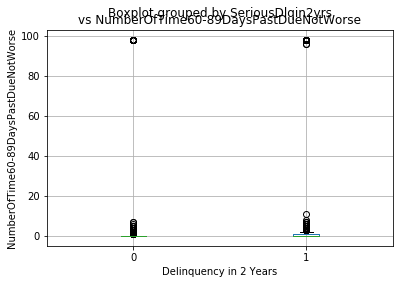

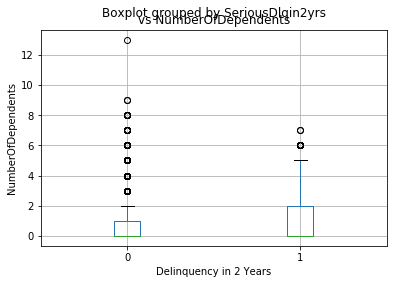

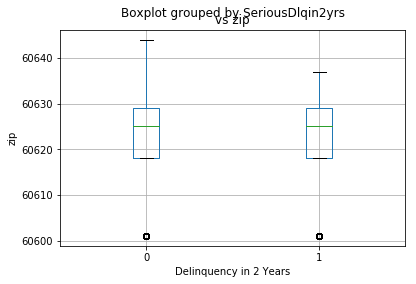

In [7]:
#cred_df = pd.read_csv('data/credit_data.csv')
#cred_df.drop(['zipcode', 'PersonID'], axis=1, inplace=True)
def make_boxplots(dataframe):
    '''
    function to make boxplots showing how each variable changes based on whether they are
    delinquent or not
    input: dataframe
    output: boxplots!
    '''
    for col in list(dataframe):
        if col not in ['zipcode', 'PersonID', 'SeriousDlqin2yrs']:
            dataframe.boxplot(col, by="SeriousDlqin2yrs")
            plt.title('vs ' + col)
            plt.xlabel('Delinquency in 2 Years')
            plt.ylabel(col)

            plt.show()

make_boxplots(cred_df)

In [8]:
# dealing with outliers: calculate z-scores for each data point, then determine how many datapoints in each row are outliers.
# outlier is defined as having a zscore greater than 1.96.

cred_df_sans_del = cred_df.drop(['SeriousDlqin2yrs'], axis=1)
cols = list(cred_df_sans_del)

zscore_df = pd.DataFrame(columns=["num_outliers"])
for col in cols:
    col_zscore = col + '_zscore'
    zscore_single_col = (cred_df_sans_del[col] - cred_df_sans_del[col].mean())/cred_df_sans_del[col].std()
    zscore_df.loc[:,col_zscore] = zscore_single_col
zscore_df.head()

,num_outliers,PersonID_zscore,RevolvingUtilizationOfUnsecuredLines_zscore,age_zscore,zipcode_zscore,NumberOfTime30-59DaysPastDueNotWorse_zscore,DebtRatio_zscore,MonthlyIncome_zscore,NumberOfOpenCreditLinesAndLoans_zscore,NumberOfTimes90DaysLate_zscore,NumberRealEstateLoansOrLines_zscore,NumberOfTime60-89DaysPastDueNotWorse_zscore,NumberOfDependents_zscore,zip_zscore
0,NaN,-0.598453,-0.024257,0.224896,-1.904496,-0.113192,0.133894,-0.489260,-1.229706,-0.08084,-0.874310,-0.071879,-0.689603,-1.904496
1,NaN,-0.597920,-0.026298,1.309871,-1.904496,-0.113192,-0.255379,0.675773,-0.269520,-0.08084,0.859054,-0.071879,-0.689603,-1.904496
2,NaN,-0.597173,-0.028570,-0.046348,-1.904496,-0.113192,-0.255722,-0.176919,-0.653594,-0.08084,-0.874310,-0.071879,-0.689603,-1.904496
3,NaN,-0.596782,-0.024644,0.224896,-1.904496,0.655208,-0.255120,0.183910,0.690666,-0.08084,1.725736,-0.071879,-0.689603,-1.904496
4,NaN,-0.596639,-0.028649,-0.453214,-1.904496,-0.113192,-0.255695,0.284603,-0.845631,-0.08084,-0.874310,-0.071879,1.094090,-1.904496


In [9]:
# calculate number of outliers in the row
trans = zscore_df.transpose()
sumsgreat = (trans > 1.96).sum()
sumsless = (trans < -1.96).sum()
sums = sumsgreat + sumsless
zscore_df['num_outliers'] = sumsgreat + sumsless

# figure out which rows have any and many outliers.
# if more than 33% of the entries in it are outliers, remove that row from the z-score table. WHY?
trans2 = zscore_df.transpose()
rows_with_any_outliers = []
rows_with_many_outliers = []
for x in list(trans2):
    if trans2[x]['num_outliers'] > 0:
        rows_with_any_outliers.append(x)
    if trans2[x]['num_outliers'] > 4:
        rows_with_many_outliers.append(x)
        trans2 = trans2.drop([x], axis=1)
zscores_minus_outliers = trans2.transpose()


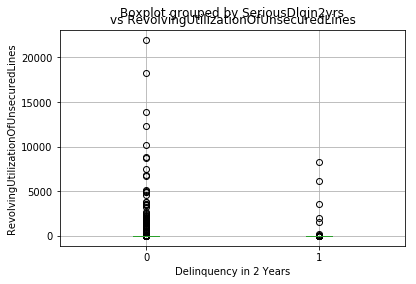

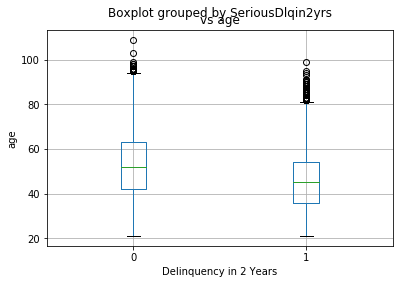

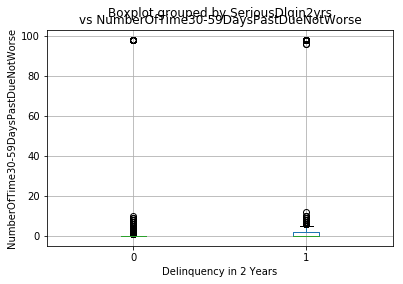

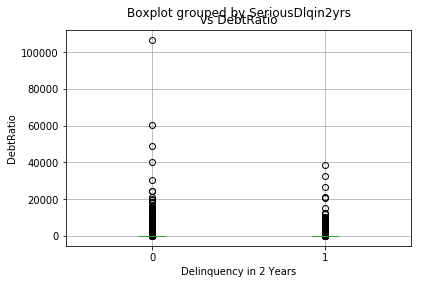

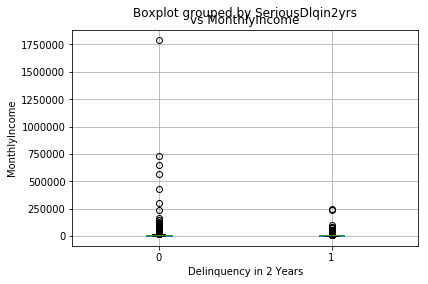

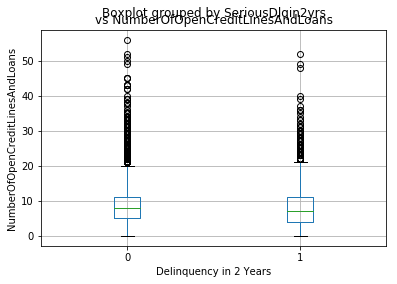

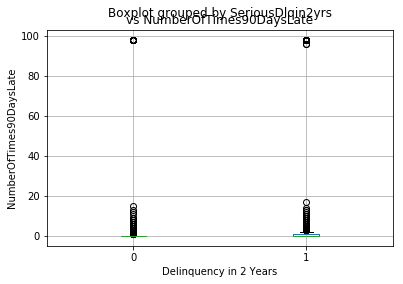

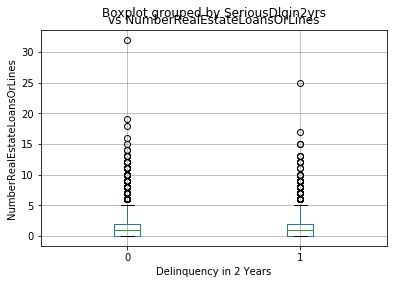

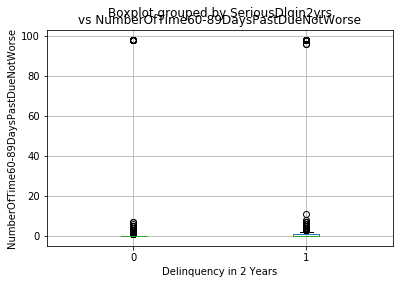

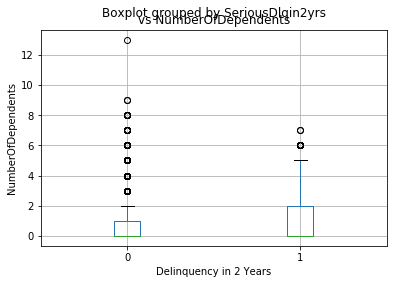

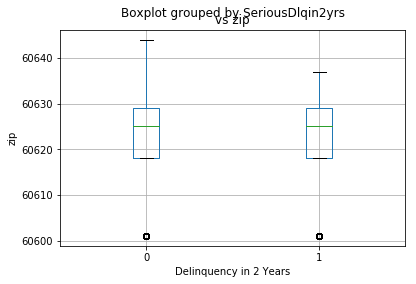

In [10]:
# create dataframe minus people with many outliers then rerun boxplots to see if anything changes
cred_df_minus_outliers = cred_df.drop(rows_with_many_outliers)

make_boxplots(cred_df_minus_outliers)

In [11]:
# re run scatter plots to see what's up
#make_scatter(cred_df_minus_outliers)

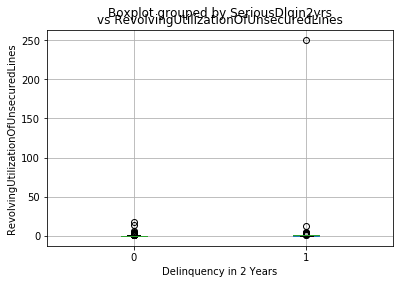

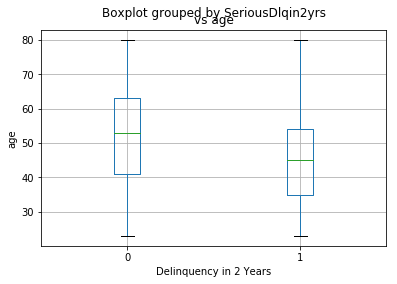

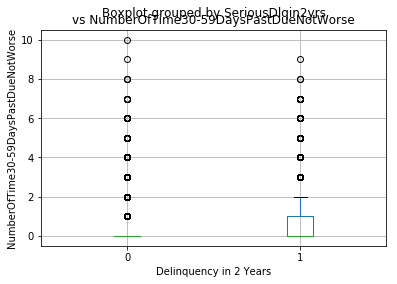

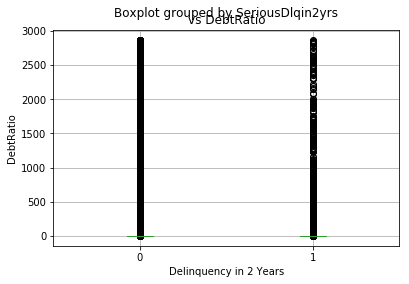

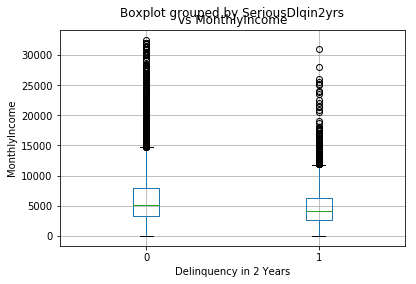

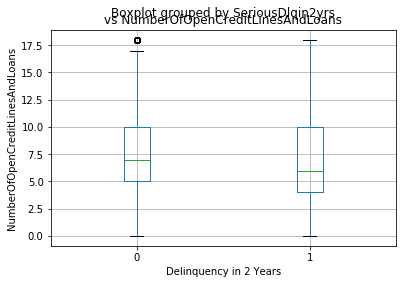

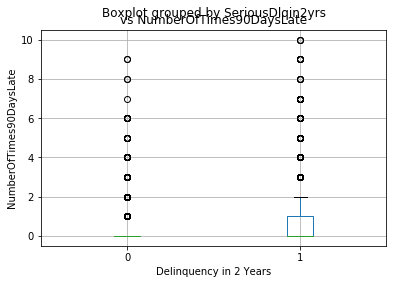

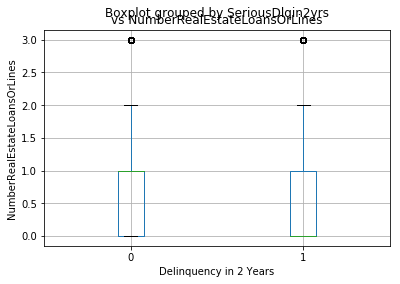

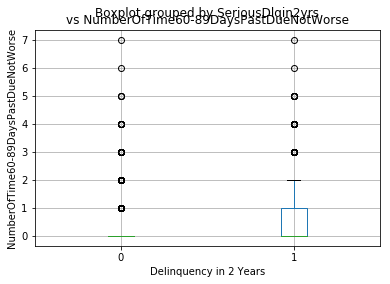

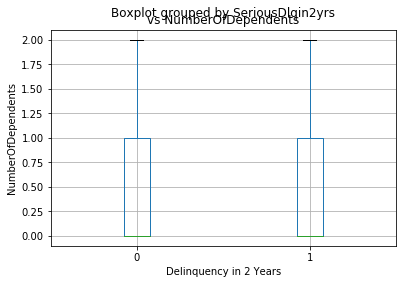

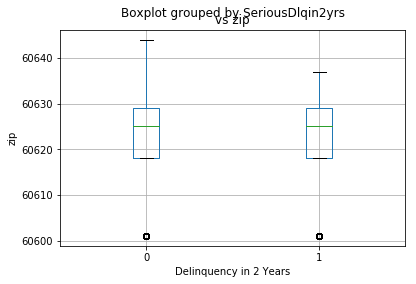

In [12]:
# create dataframe minus people with man outliers then rerun boxplots to see if anything changes
cred_df_no_outliers = cred_df.drop(rows_with_any_outliers)

make_boxplots(cred_df_no_outliers)

In [13]:
# re run scatter to see what's up
# commented this out because it takes too much time to run
#make_scatter(cred_df_no_outliers)

In [14]:
# are there any nas?
cred_df.isna().any()

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
zip                                     False
dtype: bool

In [15]:
# created function to fill nas based on specific inputs user want to use.
# I chose to use median because it is less likely to be affected by outliers.
# Before creating this function, I check the median and mean of columns with missing data on the full dataset, 
# the dataset with less outliers, and the dataset with no outliers (outliers as defined above). 
# I chose median and the full dataset because the median wasn't as affected by outliers, and in case outliers
# wasn't someone lying, I wanted the algorithm to account for that. Those sound like opposites, but mainly I wanted to 
# choose the stable one between median and mean, while still accounting for all data/not overfitting the data.

def fillnas_with_data(dataframe, stat, variables):
    '''
    fill the nas with different values based on inputs.
    inputs:
        dataframe: either with outliers, without rows with many outliers, or without rows with at least one outlier
        stat: either median or mean
        variables: the variables to be filled.
    outputs: dataframe with nas filled
    '''
    for var in variables:
        if stat == "median" or "Median":
            fill_type = "median_" + var
            fill_name = dataframe[var].median()
            dataframe[var] = dataframe[var].fillna(fill_name)
        elif stat == "mean" or "Mean" or "average" or "Average":
            fill_type = "mean_" + var
            fill_name = dataframe[var].mean()
            dataframe[var] = dataframe[var].fillna(fill_name)
        else:
            print("Error: please only use median, Median, mean, Mean, average, or Average")

# options for dataframes: cred_df_no_outliers, cred_df_minus_outliers, cred_df
# options for stat = mean or median
fillnas_with_data(cred_df, "median", ["MonthlyIncome", "NumberOfDependents"])
cred_df.isna().any()

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
zip                                     False
dtype: bool

In [16]:
#print(list(cred_df))
# discretize variable of choice by any buckets with equal-width bins or quantile bins
# Wanted the user to have the choice of either cut or qcut. I chose cut because I didn't want each bin to have the same 
    # number of entries, and I chose age because I'm curious how the analysis changes by age range.

def discretize_variables(dataframe, col_name, buckets, cut_type):
    '''
    function to discretize variables.
    inputs:
        dataframe: cred_df, cred_df_no_outliers, cred_df_less_outliers
        col_name: the name of the column from the dataframe user wants to discretize
        buckets: number of buckets want to discretize by
        cut_type: way to make the buckets - either equal-width bins (cut), or quantile bins (qcut)
    output:
        dataframe with a column that's changed from continuous to discrete.
    '''
    if cut_type == "cut" or "Cut":
        dataframe[col_name] = pd.cut(dataframe[col_name], buckets)
    elif cut_type == "qcut" or "Qcut":
        dataframe[col_name] = pd.qcut(dataframe[col_name], buckets)
    else:
        print("Error: Please only use cut or qcut")
    
# options for dataframes: cred_df_no_outliers, cred_df_minus_outliers, cred_df
#options for cut_type: cut, Cut, qcut, Qcut
# if using cut for the cut_type:
    # options for col_names = 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
        # 'DebtRatio' (use with less or no outliers dataframes because data are too concentrated),
        # 'MonthlyIncome' (use with less or no outliers dataframes because data are too concentrated),
        # 'NumberOfOpenCreditLinesAndLoans' (get more variety with less or no outliers, but fine with all data, too)
        # 'NumberRealEstateLoansOrLines'(use with less or no outliers dataframes because data are too concentrated), 
        # 'NumberOfDependents' (use with less or no outliers dataframes or with higher number of buckets (10+)
            # because data are too concentrated)
# if using qcut for cut_type:
    # options for col_names ='age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'

#discretize_variables(cred_df, 'age', 10, "cut")
cred_df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,zip
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0,60601
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0,60601
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0,60601
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0,60601
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0,60601


In [17]:
# create binary/dummy variables from categorical variable
def dummify_categories(dataframe, col_name):
    '''
    function to create dummy variables from categorized data.
    inputs: 
        dataframe: either cred_df, cred_df_no_outliers, or cred_df_less_outliers
        col_name: column name of column to dummify
    outputs: pandas series of dummy data
    '''
    dummies = pd.get_dummies(dataframe[col_name], prefix=col_name)
    dummies.head()

dummify_categories(cred_df, "zipcode") 

In [18]:
# build classifer: For this assignment, select any classifier you feel comfortable with
X = cred_df.drop(['SeriousDlqin2yrs', 'PersonID'], axis=1)
Y = cred_df['SeriousDlqin2yrs']
test_size = 0.3 # adjusted this to see what I liked most
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [19]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', metric_params={'p': 3})

C:\Users\Alix Gates\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  """Entry point for launching an IPython kernel.


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
# Evaluate Classifier: you can use any metric you choose for this assignment 
# (accuracy is the easiest one). Feel free to evaluate it on the same data you built
# the model on (this is not a good idea in general but for this assignment, it is
# fine). We haven't covered models and evaluation yet, so don't worry about
# creating validation sets or cross-validation.
knn.score(x_test,y_test)

0.8190979276716782

In [25]:
knn.predict_proba(X)

array([[1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])